# Decision Tree

Widely used to tackle classification and regression problems. Essentially, learn a hierarchical structure of if/else statments.

## 1.0 Decision Tree Example

In [1]:
import mglearn

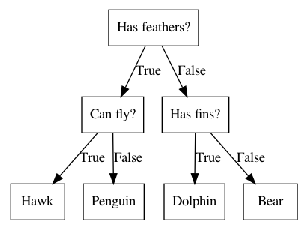

In [2]:
mglearn.plots.plot_animal_tree()

This is a tree. A tree is a particular case of a graph. Like a graph, a tree has nodes and edges.
In a decision tree, each node has a question and the edges are the possible answers, the exception
occurs in the nodes (leaves) that are most distant from the root (root: "Has feathers?"). In this case, they have the answers we are looking for.

Suppose there are 4 animals [Hawk, Penguin, Dolphin and Bear].
Someone select one of them randomly and you have to discover which one was selected.
Therefore, you start asking questions based on the decision tree above: 
    You: Has feathers?
    Answer: No
    
    You: Has fins?
    Answer: yes
    
    You: Therefore, it is a dolphin!

## 2.0 Decision Tree Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [5]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


The tree has 100% accuracy on training set. This is because the tree is complex enough to memorize all labels on the training data. The problem is that it hardly will generalize well.
The good news is that decision tree has some parameters we can tweek in order to control the tree complexity (avoid overfitting).

One of them is "max_depth". This is a pre-prunning parameter. Once the tree reaches the depth specified, the algorithm stops splitting.

In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


We can visualize the induced decision tree with graphiz

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names,
               impurity=False, filled=True)

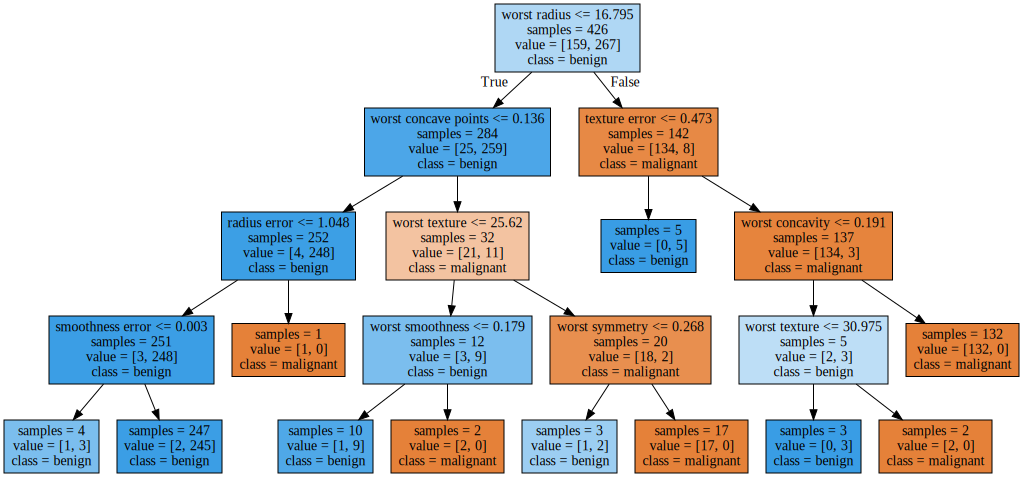

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

You can see that decision trees are very easy to explain, but the deeper, the more complex. An usefull method is to investigate which path, most of the data actually takes.

### 2.1 Decision Tree - Feature Importances

We can see the feature importances according to the induced tree.

In [9]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

The feature importances sums up to 1. Features with 0 importance are not used at all.

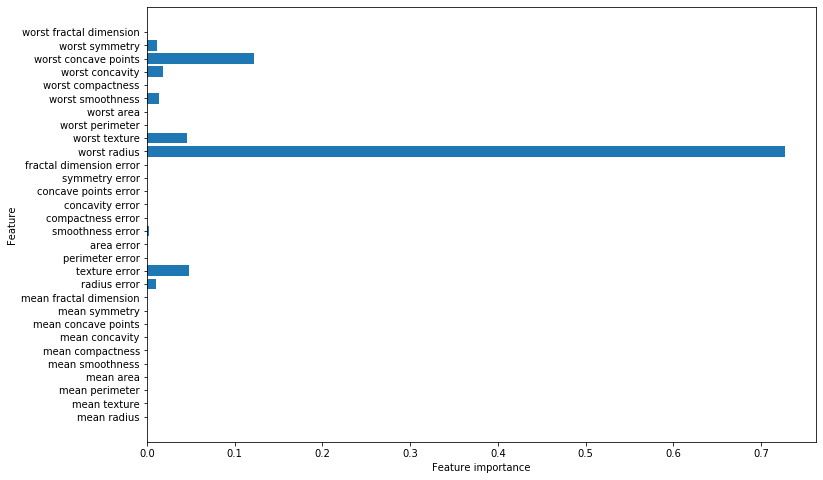

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

# 3.0 Decision Tree Regressor

The usage and analysis is very similar to the classification trees, but tree-based regression models are not able to make predic

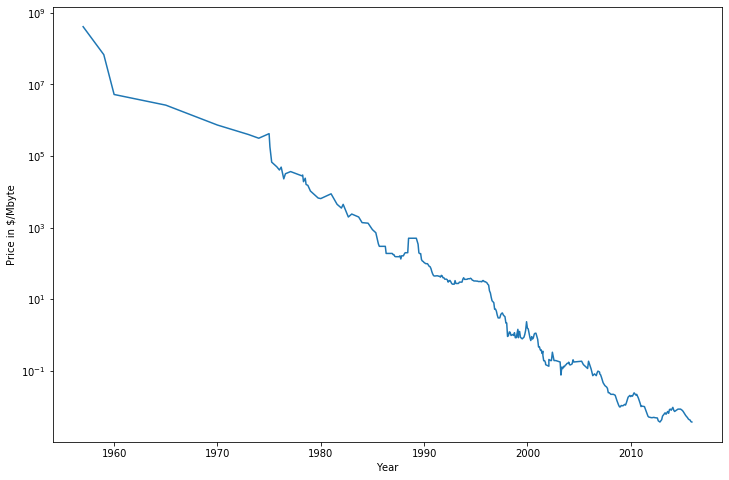

In [18]:
import pandas as pd
ram_prices = pd.read_csv("https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.values[:, np.newaxis]

y_train = np.log(data_train.price) #log-transform to get a simpler relathinship daxa x target

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.values[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

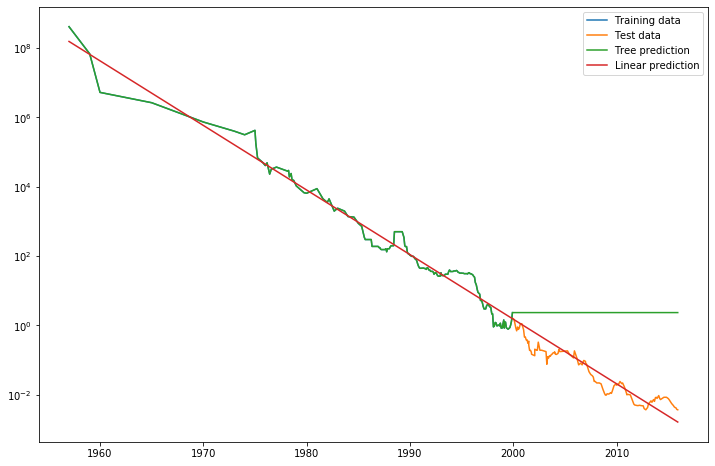

In [38]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

A strong drawback for tree-based regressions is that it usually do not generalize :/

# 4.0 Strengths, weaknesses and parameters 

The model complexity in tree-based models can be controlled by prunning the tree. In sklearn, we have the parameters
max_depth, max_leaf_nodes and min_samples_leaf that are related to pre-prunning technique. Usually one of them are chose to control the model complexity.

Decision trees are very easy to explain and can deal with features of different scales. Therefore, we don't need to normalize or standardize the dataset.

A strong drawback is that tree models tend to overfitting (even with parameter control).